<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Laboratorios/Laboratorio_01_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# Laboratorio 1.0:

## Series de tiempo

El siguiente [dataset](https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv) contiene información del precio del eur/usd  desde el 05/07/2022/ hasta el 12/05/2023 con periodicidad de una hora. El data frame contiene el precio de apertura, cierrre, valor más bajo cotizado, valor más alto cotizado, volumen, spread etc. Para este dataset, realizar lo siguiente:


1. Leer el dataset desde el github.


In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv"

df = pd.read_csv(url)
df.head()

,Unnamed: 0,time,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
0,0,2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
1,1,2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2,2,2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
3,3,2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
4,4,2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365


2. Definir como indice la columna time.


In [3]:
print(type(df.time[0]))
print(type(pd.to_datetime(df.time[0])))

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [4]:
df.index = pd.to_datetime(df.time)
df.head(1)

,Unnamed: 0,time,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
time,,,,,,,,,,,,,
2022-07-25 13:00:00,0,2022-07-25 13:00:00,1.02427,1.0243,1.02145,1.02345,3927,8,0,1.02386,-0.00046,-0.00082,-0.00064


In [5]:
df.drop(columns=["Unnamed: 0","time"], inplace=True)
df.index.day

Index([25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
       ...
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
      dtype='int32', name='time', length=5000)

In [6]:
df.head(2)

,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
time,,,,,,,,,,,
2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.02386,-0.00046,-0.00082,-0.00064
2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.02322,-0.00046,-0.00082,-0.00064


3. Obtenga información del data frame.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2022-07-25 13:00:00 to 2023-05-12 23:00:00
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   open                5000 non-null   float64
 1   high                5000 non-null   float64
 2   low                 5000 non-null   float64
 3   close               5000 non-null   float64
 4   tick_volume         5000 non-null   int64  
 5   spread              5000 non-null   int64  
 6   real_volume         5000 non-null   int64  
 7   MeanCloseOpen       5000 non-null   float64
 8   Diff_Close          5000 non-null   float64
 9   Diff_Open           5000 non-null   float64
 10  Diff_MeanCloseOpen  5000 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 468.8 KB


**Segun esto no hay valores NULL**

4. Determine si hay null, nan en el data frame.

In [8]:
print("El número de NULL en cada columna es:")
print(df.isnull().sum())

print("El número de NaN en cada columna es:")
print(df.isna().sum())

El número de NULL en cada columna es:
open                  0
high                  0
low                   0
close                 0
tick_volume           0
spread                0
real_volume           0
MeanCloseOpen         0
Diff_Close            0
Diff_Open             0
Diff_MeanCloseOpen    0
dtype: int64
El número de NaN en cada columna es:
open                  0
high                  0
low                   0
close                 0
tick_volume           0
spread                0
real_volume           0
MeanCloseOpen         0
Diff_Close            0
Diff_Open             0
Diff_MeanCloseOpen    0
dtype: int64


5. Emplea la notacion Pascal Case y trabaja solo con la columa del precio de cierre del eur/usd.

In [9]:
df_Close = df
df_Close.columns

Index(['open', 'high', 'low', 'close', 'tick_volume', 'spread', 'real_volume',
       'MeanCloseOpen', 'Diff_Close', 'Diff_Open', 'Diff_MeanCloseOpen'],
      dtype='object')

In [10]:
df_Close = df_Close[["close"]]
df_Close.columns = ["Close"]
df_Close.head(2)

,Close
time,
2022-07-25 13:00:00,1.02345
2022-07-25 14:00:00,1.02299


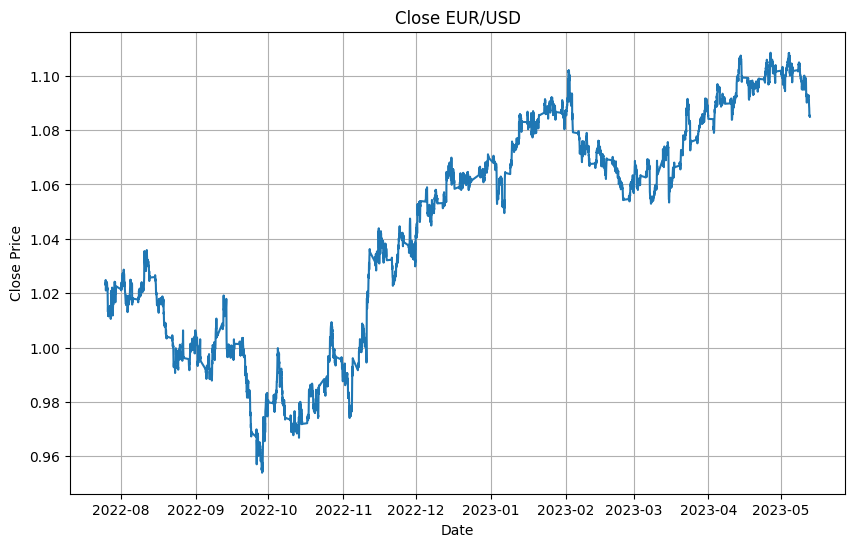

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df_Close.index, df_Close.Close, label="Close EUR/USD")
plt.title("Close EUR/USD")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid()

6. Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:

- Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.

**R:** Debido a que el dt entre cada dato es de una hora la diferencia entre cada fila nos dará el correspondiente valor.

In [12]:
df_Close["DiffPrice"] = df_Close.Close.diff(1)
df_Close.head()

/tmp/ipykernel_119944/2281752543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Close["DiffPrice"] = df_Close.Close.diff(1)


,Close,DiffPrice
time,,
2022-07-25 13:00:00,1.02345,NaN
2022-07-25 14:00:00,1.02299,-0.00046
2022-07-25 15:00:00,1.02457,0.00158
2022-07-25 16:00:00,1.02485,0.00028
2022-07-25 17:00:00,1.02181,-0.00304


- Para la nueva columna construya un histograma de los datos.

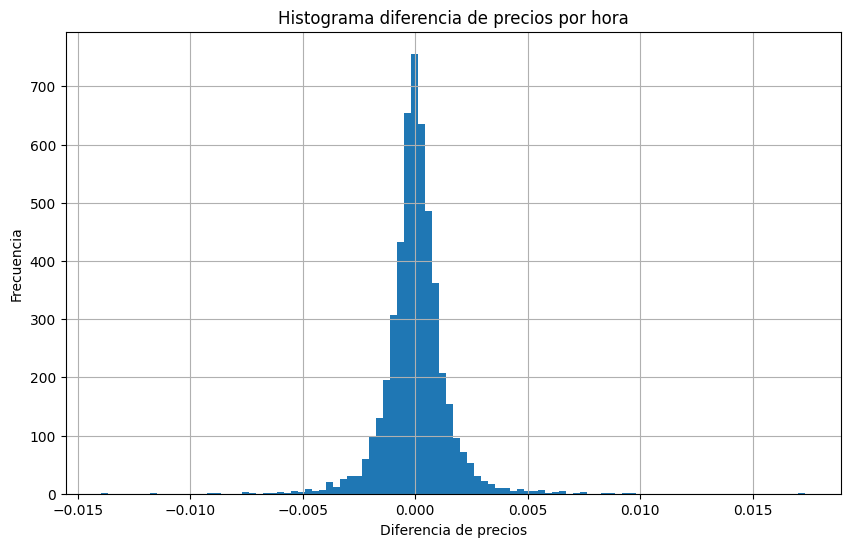

In [13]:
# Crear un histograma de la diferencia de precios

plt.figure(figsize=(10,6))
plt.hist(df_Close.DiffPrice[1:], bins=100)
plt.title("Histograma diferencia de precios por hora")
plt.xlabel("Diferencia de precios")
plt.ylabel("Frecuencia")
plt.grid()

- Determine la mejor distribucion estadística que se ajusta al histograma anterior, para ello puede emplear lo siguente:

2024-09-30 22:19:23.912 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=106744.023571)
2024-09-30 22:19:24.055 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=923360.482403)
2024-09-30 22:19:24.277 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted beta distribution with error=106676.111621)
2024-09-30 22:19:24.427 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=106500.661168)
2024-09-30 22:19:24.497 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted burr distribution with error=721804.561088)


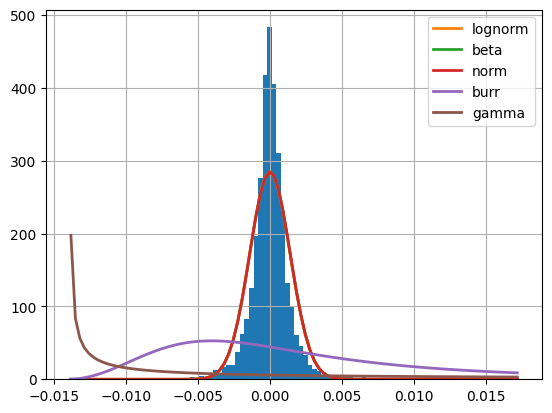

In [14]:
from fitter import Fitter, get_common_distributions, get_distributions

# Ajuste de las distribuciones seleccionadas con los datos originales
f = Fitter(df_Close.DiffPrice[1:],
           distributions=['gamma', 'lognorm', 'beta', 'burr', 'norm'])
f.fit()
f.summary()

# Identificar la mejor distribución con el método de suma de errores cuadrados
best_dist = f.get_best(method='sumsquare_error')


In [15]:
print("La mejor distribución es: ", best_dist)

La mejor distribución es:  {'lognorm': {'s': 0.009509964461157715, 'loc': -0.1471693008245066, 'scale': 0.14717494036949658}}



7. Para el data frame, seleccionemos solo los datos del 2023.

In [16]:
# Seleccionar los datos del 2023

df_2023 = df_Close[df_Close.index.year == 2023]
df_2023.head()

,Close,DiffPrice
time,,
2023-01-02 00:00:00,1.06796,-0.00200
2023-01-02 01:00:00,1.06965,0.00169
2023-01-02 02:00:00,1.07058,0.00093
2023-01-02 03:00:00,1.06896,-0.00162
2023-01-02 04:00:00,1.06880,-0.00016


8. El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes


In [17]:
df_15Days = df_2023.groupby(pd.Grouper(freq='15D')).mean()
df_1Week = df_2023.groupby(pd.Grouper(freq='1W')).mean()
df_1Month = df_2023.groupby(pd.Grouper(freq='1ME')).mean()

print("El promedio de los precios cada 15 días es:",
       df_15Days["Close"].mean())

print("El promedio de los precios cada semana es:", 
      df_1Week["Close"].mean())

print("El promedio de los precios cada mes es:", 
      df_1Month["Close"].mean())

print("\n")

print("La diferencia promedio de los precios cada 15 días es:",
       df_15Days["DiffPrice"].mean())

print("La diferencia promedio de los precios cada semana es:", 
      df_1Week["DiffPrice"].mean())

print("La diferencia promedio de los precios cada mes es:", 
      df_1Month["DiffPrice"].mean())

El promedio de los precios cada 15 días es: 1.0812156923612857
El promedio de los precios cada semana es: 1.0807217421863482
El promedio de los precios cada mes es: 1.0829070029545456


La diferencia promedio de los precios cada 15 días es: 6.551485623062334e-06
La diferencia promedio de los precios cada semana es: 6.614551083591326e-06
La diferencia promedio de los precios cada mes es: -2.727196969696994e-06


In [18]:
df_1Month

,Close,DiffPrice
time,,
2023-01-31,1.077463,0.000031
2023-02-28,1.071167,-0.000060
2023-03-31,1.070874,0.000049
2023-04-30,1.096051,0.000036
2023-05-31,1.098980,-0.000069


9. Para los datos asociados a los meses de 2023, construya un histograma para cada mes.  Para ello puedo emplear el metodo groupby. Notetese que si no  realiza una operación después de aplicar el metodo grouby, podrias iterar sobre dicho objeto, por ejemplo:

2024-09-30 22:19:25.305 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=202880.053852)
2024-09-30 22:19:25.783 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted burr distribution with error=1904534.269932)
2024-09-30 22:19:27.092 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted beta distribution with error=202891.303837)
2024-09-30 22:19:27.122 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=206559.064127)
2024-09-30 22:19:27.186 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=201727.737283)


La mejor distribución para January 2023 es: lognorm


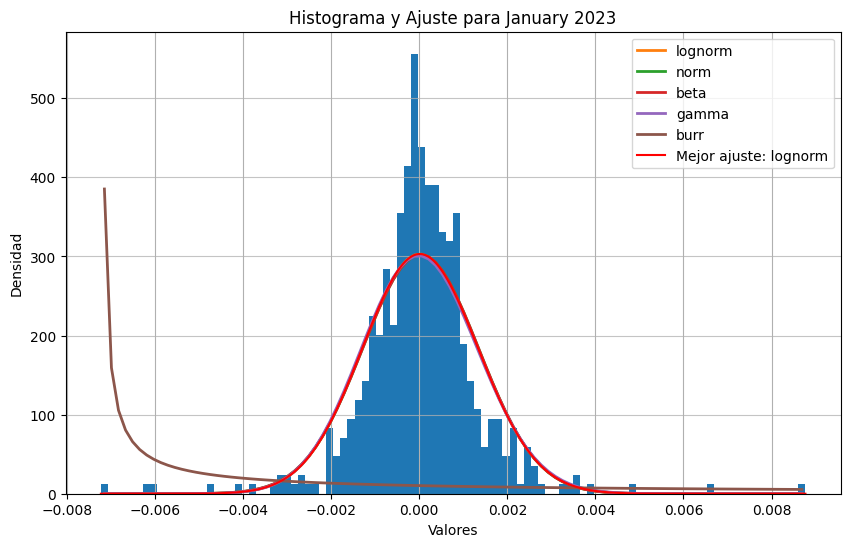

2024-09-30 22:19:27.617 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=288646.90246)
2024-09-30 22:19:27.696 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=2237966.141386)
2024-09-30 22:19:27.741 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted beta distribution with error=286077.082148)
2024-09-30 22:19:27.810 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=288451.656416)
2024-09-30 22:19:27.870 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted burr distribution with error=2236415.287335)


La mejor distribución para February 2023 es: beta


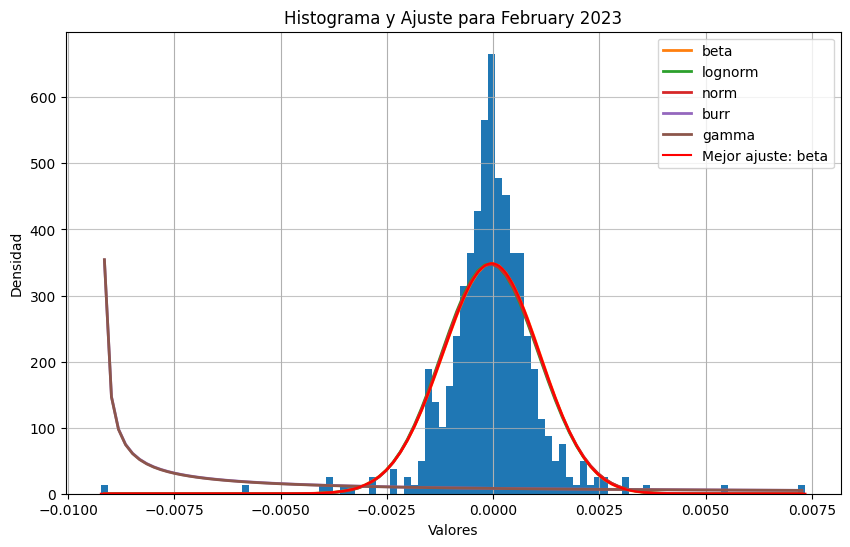

2024-09-30 22:19:28.450 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=283065.958746)
2024-09-30 22:19:28.523 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=288128.366252)
2024-09-30 22:19:28.581 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted beta distribution with error=282951.260166)
2024-09-30 22:19:28.588 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=282704.8614)
2024-09-30 22:19:28.687 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted burr distribution with error=2310500.558403)


La mejor distribución para March 2023 es: lognorm


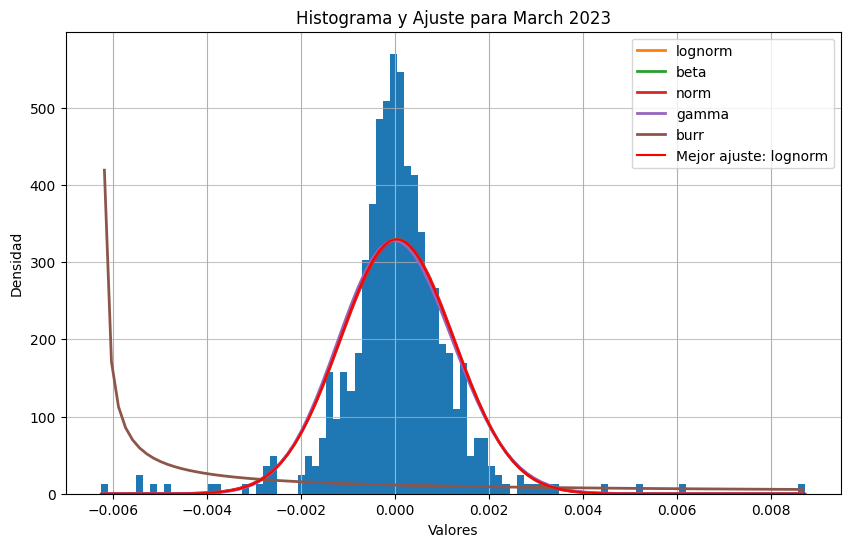

2024-09-30 22:19:29.175 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=465524.49674)
2024-09-30 22:19:29.246 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=505836.186496)
2024-09-30 22:19:29.281 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=469143.432571)
2024-09-30 22:19:29.311 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted beta distribution with error=464573.754433)
2024-09-30 22:19:29.430 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted burr distribution with error=3686647.290716)


La mejor distribución para April 2023 es: beta


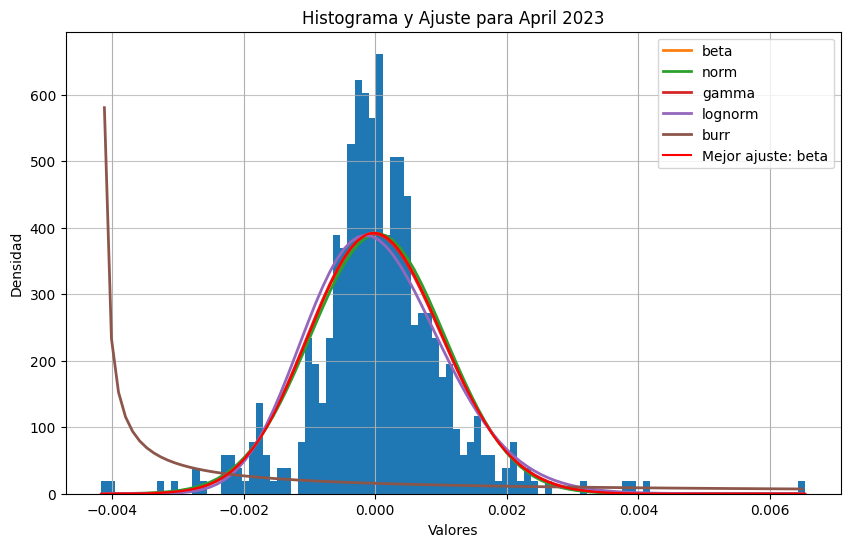

2024-09-30 22:19:30.225 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=609570.699531)
2024-09-30 22:19:30.303 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=3391782.822304)
2024-09-30 22:19:30.350 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted beta distribution with error=585526.326267)
2024-09-30 22:19:30.390 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=606112.635429)
2024-09-30 22:19:30.486 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted burr distribution with error=3362851.985816)


La mejor distribución para May 2023 es: beta


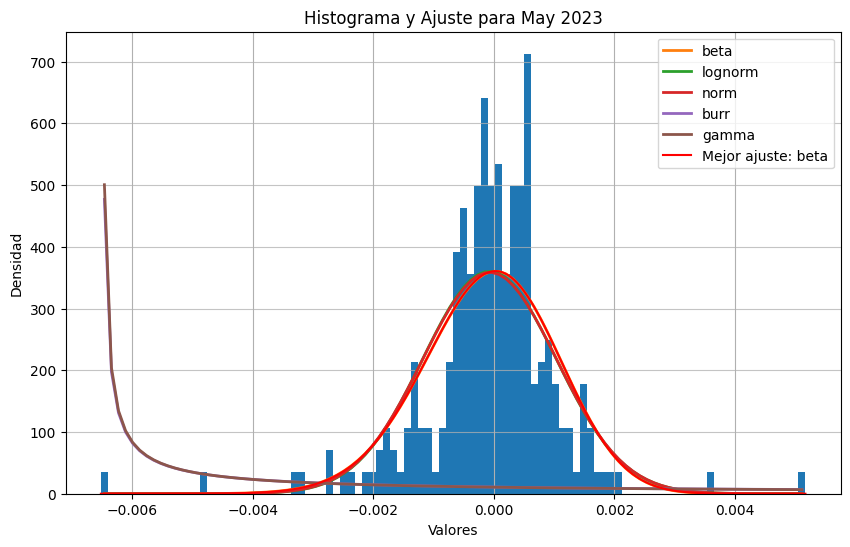

In [19]:
monthsGroups = df_2023.groupby(pd.Grouper(freq='1ME'))

import scipy.stats
import numpy as np

for month, group in monthsGroups:
    # Crear histograma
    plt.figure(figsize=(10, 6))
    plt.hist(group['DiffPrice'], bins=30, density=True, alpha=0.7, color='blue', label='Datos Histograma')

    # Ajuste de las distribuciones seleccionadas
    f = Fitter(group['DiffPrice'], distributions=['gamma', 'lognorm', 'beta', 'burr', 'norm'])
    f.fit()

    # Resumen de las distribuciones ajustadas
    f.summary()

    # Identificar la mejor distribución
    best_dist = f.get_best(method='sumsquare_error')
    best_dist_name = list(best_dist.keys())[0]  # Obtener el nombre de la mejor distribución
    print(f'La mejor distribución para {month.strftime("%B %Y")} es: {best_dist_name}')

    # Graficar la PDF ajustada
    x = np.linspace(min(group['DiffPrice']), max(group['DiffPrice']), 1000)
    params = f.fitted_param[best_dist_name]  # Acceder a los parámetros de la mejor distribución
    pdf = getattr(scipy.stats, best_dist_name).pdf(x, *params)
    plt.plot(x, pdf, label=f'Mejor ajuste: {best_dist_name}', color='red')

    plt.title(f'Histograma y Ajuste para {month.strftime("%B %Y")}')
    plt.xlabel('Valores')
    plt.ylabel('Densidad')
    plt.legend()
    plt.grid(axis='y', alpha=0.75)
    plt.show()

In [20]:
# FIN PRIMERA PARTE

## Análisis de datos con pandas.

Para el siguiente [dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) realizar lo siguiente:


1. Leer los datos desde una página web.



In [21]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  

# Combinar X e y en un único DataFrame
df = pd.DataFrame(X)
df['Diagnosis'] = y  # Añadir la columna de diagnóstico

# Mostrar las primeras filas del DataFrame
df.head()


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


2. Renombrar las columnas en formato PascalCase.

In [22]:
def to_pascal_case(s):
    return ''.join(word.capitalize() for word in s.split('_'))

df.columns = [to_pascal_case(col) for col in df.columns]
df.columns

Index(['Radius1', 'Texture1', 'Perimeter1', 'Area1', 'Smoothness1',
       'Compactness1', 'Concavity1', 'ConcavePoints1', 'Symmetry1',
       'FractalDimension1', 'Radius2', 'Texture2', 'Perimeter2', 'Area2',
       'Smoothness2', 'Compactness2', 'Concavity2', 'ConcavePoints2',
       'Symmetry2', 'FractalDimension2', 'Radius3', 'Texture3', 'Perimeter3',
       'Area3', 'Smoothness3', 'Compactness3', 'Concavity3', 'ConcavePoints3',
       'Symmetry3', 'FractalDimension3', 'Diagnosis'],
      dtype='object')

3. Utilizar los métodos `head()`, `tail()`, `describe()` e `info()` para obtener información sobre el `DataFrame`.

In [23]:
df.head()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [24]:
df.tail()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,B


In [25]:
df.describe()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Radius1            569 non-null    float64
 1   Texture1           569 non-null    float64
 2   Perimeter1         569 non-null    float64
 3   Area1              569 non-null    float64
 4   Smoothness1        569 non-null    float64
 5   Compactness1       569 non-null    float64
 6   Concavity1         569 non-null    float64
 7   ConcavePoints1     569 non-null    float64
 8   Symmetry1          569 non-null    float64
 9   FractalDimension1  569 non-null    float64
 10  Radius2            569 non-null    float64
 11  Texture2           569 non-null    float64
 12  Perimeter2         569 non-null    float64
 13  Area2              569 non-null    float64
 14  Smoothness2        569 non-null    float64
 15  Compactness2       569 non-null    float64
 16  Concavity2         569 non

4. Contabilizar la cantidad de valores nulos (`null` o `NaN`) en el `DataFrame`. Si se encuentran valores nulos, ¿qué estrategia propondrías para reemplazarlos?

In [27]:
df.isnull().sum()

Radius1              0
Texture1             0
Perimeter1           0
Area1                0
Smoothness1          0
Compactness1         0
Concavity1           0
ConcavePoints1       0
Symmetry1            0
FractalDimension1    0
Radius2              0
Texture2             0
Perimeter2           0
Area2                0
Smoothness2          0
Compactness2         0
Concavity2           0
ConcavePoints2       0
Symmetry2            0
FractalDimension2    0
Radius3              0
Texture3             0
Perimeter3           0
Area3                0
Smoothness3          0
Compactness3         0
Concavity3           0
ConcavePoints3       0
Symmetry3            0
FractalDimension3    0
Diagnosis            0
dtype: int64

In [28]:
df.isna().sum()

Radius1              0
Texture1             0
Perimeter1           0
Area1                0
Smoothness1          0
Compactness1         0
Concavity1           0
ConcavePoints1       0
Symmetry1            0
FractalDimension1    0
Radius2              0
Texture2             0
Perimeter2           0
Area2                0
Smoothness2          0
Compactness2         0
Concavity2           0
ConcavePoints2       0
Symmetry2            0
FractalDimension2    0
Radius3              0
Texture3             0
Perimeter3           0
Area3                0
Smoothness3          0
Compactness3         0
Concavity3           0
ConcavePoints3       0
Symmetry3            0
FractalDimension3    0
Diagnosis            0
dtype: int64

**R:** En el caso de que hubieran valores nulos o nan en el dataframe existen varias opciones:

1. La primera sería reemplazar todos estos con un valor determinado, por ejemplo el 0, usando df.fillna(0, inplace=True).

2. Otro método podría ser reemplazar con los valores de media, mediana o moda. Dependiendo de cuál de estos valores necesito y no quiero afectar colocando un valor determinado.

3. Finalmente, podría usar alguno de los valores que hay adelante o atrás en las columnas dependiendo del tipo de dato al que se haga referencia.

In [29]:
# Ejercicio 4 terrminado.

5. Identificar los valores únicos en la columna `target` que representan las etiquetas B y M (Benigno y Maligno, respectivamente). Utiliza el método `unique()` para mostrar estos valores.

In [30]:
# La columna "Diagnosis" es la variable objetivo no "Target"

df_targets = df["Diagnosis"]
df_targets.head()

0    M
1    M
2    M
3    M
4    M
Name: Diagnosis, dtype: object

In [31]:
targetDiagnostic = df['Diagnosis'].unique()
print("Los valores únicos de la variable objetivo son:",
       targetDiagnostic)

Los valores únicos de la variable objetivo son: ['M' 'B']


6. Realizar un conteo de los casos etiquetados como B y M utilizando la librería `seaborn` y el método `countplot()`:

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

M (Maligno) - B(Benigno) Diagnosis
B    357
M    212
Name: count, dtype: int64


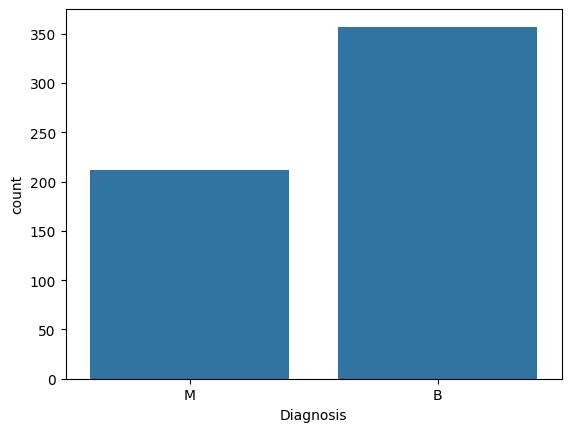

In [33]:
sns.countplot(x='Diagnosis', data=df)
frequencies = df['Diagnosis'].value_counts()
print("M (Maligno) - B(Benigno)", frequencies)


7. Agregar una nueva columna llamada `DiagnosisNumeric` donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno).



In [34]:
df['DiagnosisNumeric'] = df['Diagnosis'].map({'B': 0, 'M': 1})
df['DiagnosisNumeric'].tail()

564    1
565    1
566    1
567    1
568    0
Name: DiagnosisNumeric, dtype: int64

8. Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula:  
   `(x - mean(x)) / std(x)`

In [35]:
# Veamos los valores originales
df.head()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Diagnosis,DiagnosisNumeric
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M,1


In [36]:
numColumns = df.select_dtypes(include=['float64', 'int64']).columns
numColumns = numColumns.drop('DiagnosisNumeric')

df_norm = df.copy()

df_norm[numColumns] = df[numColumns].apply(lambda x: (x - x.mean()) / x.std())
df_norm.head()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,Diagnosis,DiagnosisNumeric
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312,M,1
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943,M,1
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214,M,1
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672,M,1
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751,M,1


9. Agrupar características similares y calcular su promedio.
   Para las siguientes características:
   
```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean',
 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean',
 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]
```

Usa expresiones regulares para identificar patrones comunes, como `radius1`, `radius2`,`radius3`, etc., y calcular los promedios. Por ejemplo:

```python
re.match(r'^[a-zA-Z_]+', "holamundo12341").group(0)
```

También puedes utilizar el método `startswith()` para buscar estos patrones en los nombres de las columnas.


In [37]:
columnsForMean = {}

columnPrefixes = ['Radius', 'Texture', 'Perimeter', 'Area', 
                  'Smoothness', 'Compactness', 'Concavity', 
                  'ConcavePoints', 'Symmetry', 'FractalDimension']

for prefix in columnPrefixes:
    matching_columns = [col for col in df.columns if col.startswith(prefix)]
    
    if matching_columns:
        columnsForMean[prefix + 'Mean'] = df[matching_columns].mean(axis=1)

dfMeans = pd.DataFrame(columnsForMean)
dfMeans.head()

,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,FractalDimensionMean
0,14.821667,9.538433,105.329667,1057.800000,0.095666,0.330747,0.355243,0.142790,0.244010,0.067934
1,15.367833,13.971300,98.366000,1118.693333,0.071255,0.092773,0.115700,0.089857,0.156697,0.049741
2,14.668533,15.855633,95.695000,1002.010000,0.086717,0.208153,0.228707,0.130493,0.196900,0.050714
3,8.941867,16.012000,59.965000,327.010000,0.120470,0.408260,0.328303,0.127123,0.327710,0.093216
4,14.529067,10.597100,97.579333,988.813333,0.083063,0.120803,0.218293,0.095217,0.144953,0.046908




10. Crear un gráfico donde se muestre el histograma de la columna `RadiusMean` separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.


In [42]:
# Añadimos los valores de Diagnosis y DiagnosisNumeric al dfMeans

dfMeans['Diagnosis'] = df['Diagnosis']
dfMeans['DiagnosisNumeric'] = df['DiagnosisNumeric']
dfMeans.head()

,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,FractalDimensionMean,DiagnosisNumeric,Diagnosis
0,14.821667,9.538433,105.329667,1057.800000,0.095666,0.330747,0.355243,0.142790,0.244010,0.067934,1,M
1,15.367833,13.971300,98.366000,1118.693333,0.071255,0.092773,0.115700,0.089857,0.156697,0.049741,1,M
2,14.668533,15.855633,95.695000,1002.010000,0.086717,0.208153,0.228707,0.130493,0.196900,0.050714,1,M
3,8.941867,16.012000,59.965000,327.010000,0.120470,0.408260,0.328303,0.127123,0.327710,0.093216,1,M
4,14.529067,10.597100,97.579333,988.813333,0.083063,0.120803,0.218293,0.095217,0.144953,0.046908,1,M


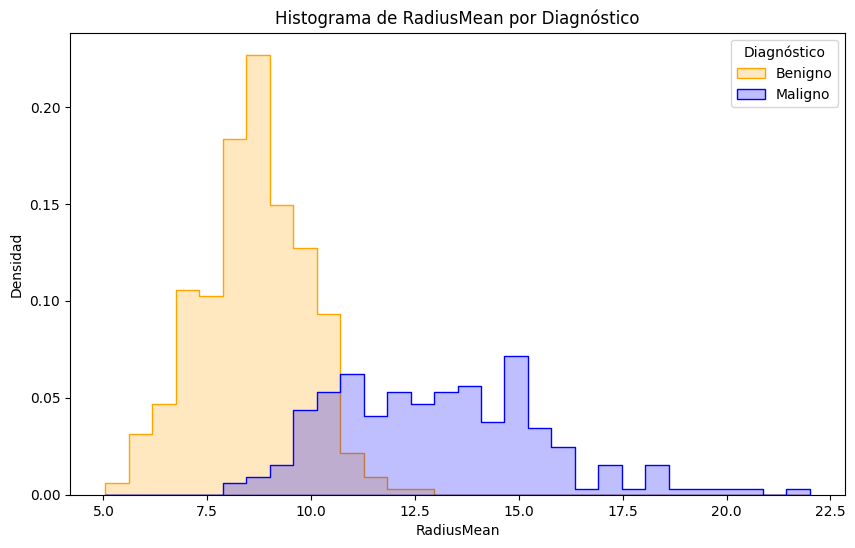

In [43]:
plt.figure(figsize=(10, 6))

sns.histplot(data=dfMeans, x='RadiusMean', hue='Diagnosis', 
             bins=30, kde=False, stat="density", 
             palette={'B': 'orange', 'M': 'blue'}, 
             element='step')

plt.title('Histograma de RadiusMean por Diagnóstico')
plt.xlabel('RadiusMean')
plt.ylabel('Densidad')
plt.legend(title='Diagnóstico', labels=['Benigno', 'Maligno'])
plt.show()

11. Generar gráficos de violín para múltiples características.
   Para las columnas:

   - `RadiusMean`
   - `TextureMean`
   - `PerimeterMean`
   - `AreaMean`
   - `SmoothnessMean`
   - `CompactnessMean`
   - `ConcavityMean`
   - `ConcavePointsMean`
   - `Symmetry3`
   - `FractalDimension3`

   Realiza un gráfico múltiple tipo violín, como en el siguiente ejemplo:

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis", var_name="features", value_name="value")
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```


In [44]:
dfMeans.columns

Index(['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean',
       'SmoothnessMean', 'CompactnessMean', 'ConcavityMean',
       'ConcavePointsMean', 'SymmetryMean', 'FractalDimensionMean',
       'DiagnosisNumeric', 'Diagnosis'],
      dtype='object')

In [48]:
columnsToPlot= dfMeans.columns[:10]

data = pd.melt(dfMeans.iloc[:, 0:10], id_vars="DiagnosisNum", var_name="features", value_name="value")
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=45)

KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['DiagnosisNum']"

12.  Determinar y eliminar los valores atípicos (`outliers`) en la columna `RadiusMean`.


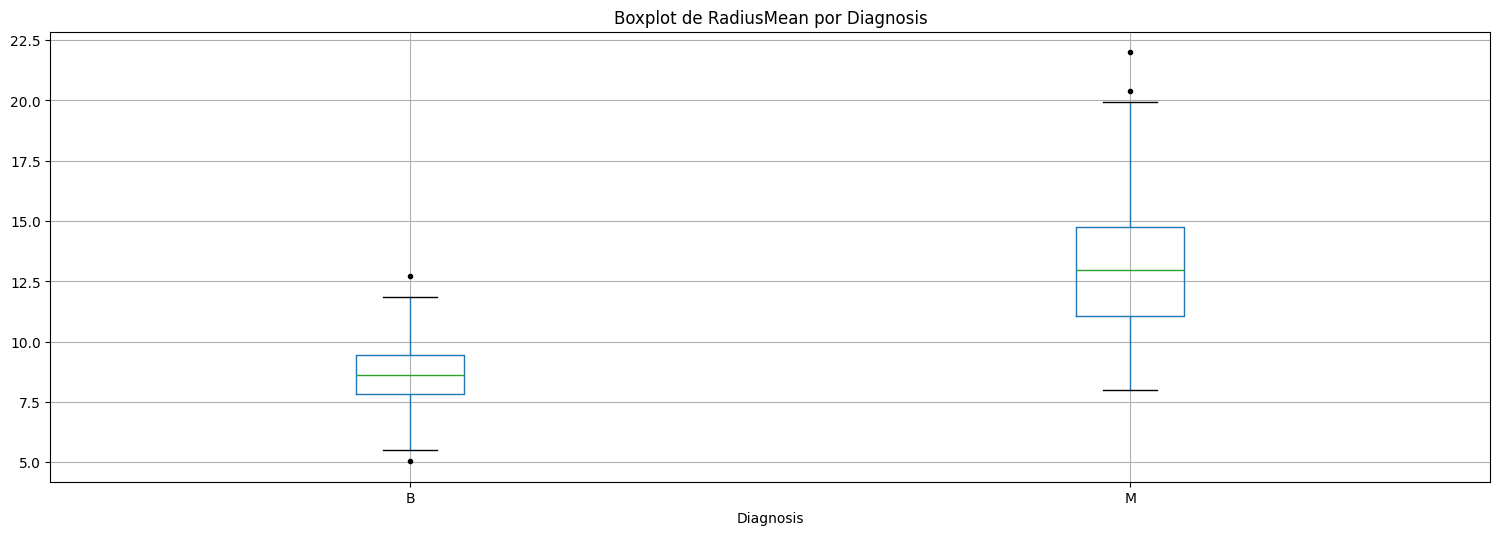

Tamaño original: 569, Tamaño filtrado: 552


In [49]:
dfMeans.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))
plt.title('Boxplot de RadiusMean por Diagnosis')
plt.suptitle('')
plt.show()


Q1 = dfMeans['RadiusMean'].quantile(0.25)
Q3 = dfMeans['RadiusMean'].quantile(0.75)
IQR = Q3 - Q1

df_filtered = dfMeans[~((dfMeans['RadiusMean'] < (Q1 - 1.5 * IQR)) | (dfMeans['RadiusMean'] > (Q3 + 1.5 * IQR)))]

print(f"Tamaño original: {dfMeans.shape[0]}, Tamaño filtrado: {df_filtered.shape[0]}")


13. Encontrar la matrix de correlación, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

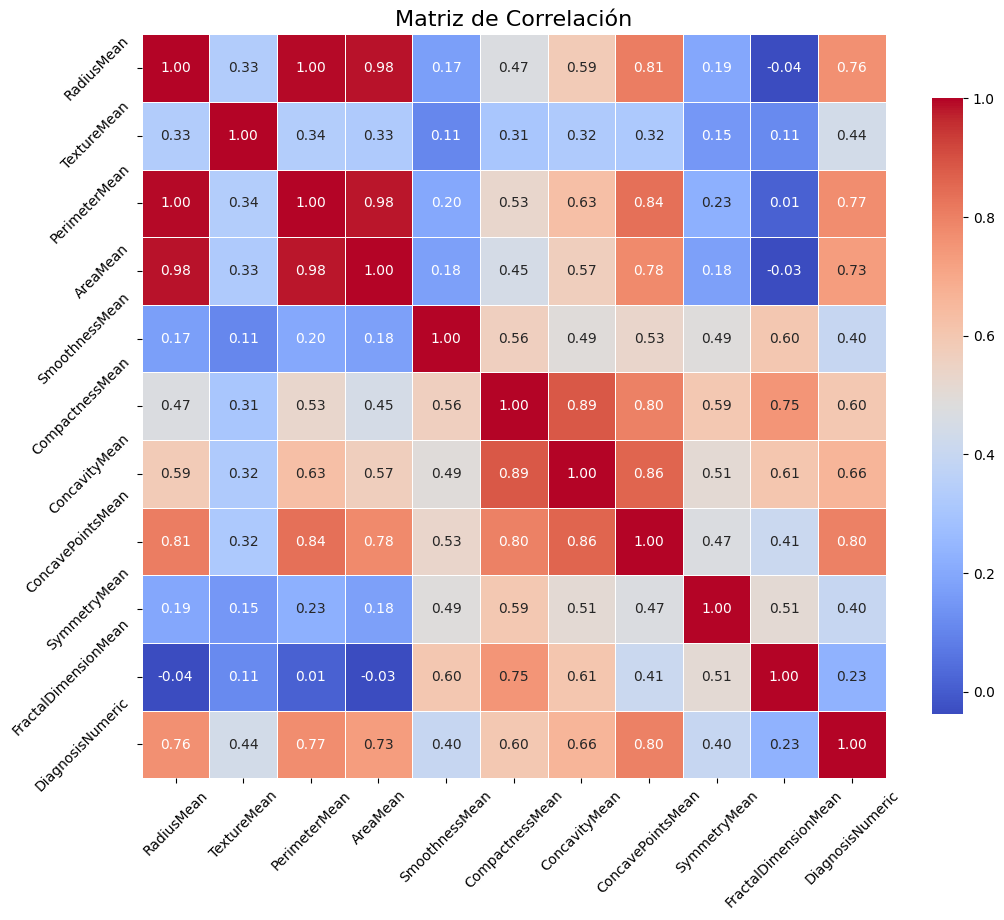

In [53]:
correlation_matrix = dfMeans.drop(columns=['Diagnosis']).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
             annot=True,       
             fmt=".2f",       
             cmap='coolwarm', 
             square=True,     
             cbar_kws={"shrink": .8}, 
             linewidths=.5)  

plt.title('Matriz de Correlación', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()
